In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import logging

import matplotlib.pyplot as plt
%matplotlib inline

import re
import copy
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean, jaccard, hamming
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# df1 = pd.read_csv("Datasets/instagram_reach.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/instagram_reach.csv")
df1.sample()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
47,8,16,_ehab.othman_,"""If you can imagine it, you can create it & if...",3139,#worldcode #coding#python #codeaholics #rstudi...,3 hours,51


In [ ]:
df1.reset_index(drop=True)
df1["Time"] = df1["Time since posted"].apply(lambda x: int(x.split(" ")[0]))
df1.drop(columns=["Unnamed: 0","S.No", "Caption", "USERNAME","Time since posted"], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Followers  100 non-null    int64 
 1   Hashtags   100 non-null    object
 2   Likes      100 non-null    int64 
 3   Time       100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
df1.describe()

,Followers,Likes,Time
count,100.00000,100.00000,100.000000
mean,961.96000,46.48000,3.460000
std,1014.62567,55.08698,3.394648
min,11.00000,8.00000,2.000000
25%,252.75000,19.00000,2.000000
50%,612.00000,29.00000,2.000000
75%,1197.00000,46.00000,3.000000
max,4496.00000,349.00000,24.000000


In [ ]:
print(df1.loc[:0]["Hashtags"])

0    #MachineLearning #AI #DataAnalytics #DataScien...
Name: Hashtags, dtype: object


In [ ]:
def convert_hastag(text):
    tags = nltk.sent_tokenize(text)

    # Process each Token and split
    tags = [re.sub("[^a-zA-Z]", " ", tag.lower()).split() for tag in tags][0]

    return tags
print("Original Hashtags ", df1["Hashtags"][0])
convert_hastag(df1["Hashtags"][0])

Original Hashtags  #MachineLearning #AI #DataAnalytics #DataScienc #DataLake


['machinelearning', 'ai', 'dataanalytics', 'datascienc', 'datalake']

In [ ]:
df1["Hashtags"]= df1["Hashtags"].apply(convert_hastag)

In [ ]:
print(df1[["Hashtags"]])

                                             Hashtags
0   [machinelearning, ai, dataanalytics, datascien...
1   [deck, mac, macintosh, sayhello, apple, stevej...
2   [whoiswho, aitrading, ai, aitradingteam, insta...
3   [iot, cre, workplace, cdo, bigdata, technology...
4   [instamachinelearning, instabigdata, instamark...
..                                                ...
95  [beverlyhills, realestate, losangelesrealestat...
96  [workspace, work, developer, development, deve...
97  [books, book, motivation, inspiration, life, b...
98  [heavyequipment, underconstruction, dozer, rea...
99  [marketing, programming, development, desarrol...

[100 rows x 1 columns]


In [ ]:
unique_hashtag = set(tag for row in df1["Hashtags"] for tag in row)
len(unique_hashtag)

1155

In [ ]:
for hashtag in unique_hashtag:
    df1[hashtag] = 0 # initialize 0 value for every hashtag


<ipython-input-12-1d92164d25e1>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[hashtag] = 0 # initialize 0 value for every hashtag
<ipython-input-12-1d92164d25e1>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[hashtag] = 0 # initialize 0 value for every hashtag
<ipython-input-12-1d92164d25e1>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

In [ ]:
for index, row in enumerate(df1["Hashtags"]): # enumerate hashtags
    for tag in row: # Row wise hashtag
        df1.at[index, tag] = 1 # appply 1 value when index and tag match


In [ ]:
df1.drop(columns=["Hashtags"], inplace=True)

In [ ]:
x1 = df1.drop(columns=["Likes", "Time"])

In [ ]:
y1 = df1[["Likes", "Time"]]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1)

In [ ]:
print(f"X_train shape = {x1_train.shape}")
print(f"X_test shape = {x1_test.shape}")
print(f"y_train shape = {y1_train.shape}")
print(f"y_test shape = {y1_test.shape}")

X_train shape = (90, 1156)
X_test shape = (10, 1156)
y_train shape = (90, 2)
y_test shape = (10, 2)


In [ ]:
y1_test

,Likes,Time
69,40,2
90,32,2
60,16,2
13,94,11
54,65,7
58,21,2
43,81,2
31,19,2
70,21,2
57,10,2


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x1_train, y1_train)

RandomForestRegressor()

In [ ]:
y1_pred = rf.predict(x1_test)
y1_pred

array([[25.75,  2.27],
       [49.12,  3.77],
       [27.6 ,  2.75],
       [32.66,  3.09],
       [70.  ,  5.51],
       [30.09,  2.58],
       [31.12,  2.63],
       [16.17,  2.46],
       [26.91,  2.5 ],
       [37.13,  3.33]])

In [ ]:
mse1 = mean_squared_error(y1_test, y1_pred)
mse1

391.97245999999996

In [ ]:
rmse1 = np.sqrt(mse1)
rmse1

19.798294370980546

In [ ]:
r2score1 = r2_score(y1_test, y1_pred)
r2score1

0.09601303939955075

In [ ]:
# df2 = pd.read_csv("DataSets/ObesityDataSet_raw_and_data_sinthetic.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df2.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df2.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1293,Female,23.000000,1.634688,82.628000,yes,yes,2.060922,2.933409,Sometimes,no,2.235282,no,0.380633,0.002600,no,Public_Transportation,Obesity_Type_I
1869,Female,26.000000,1.621245,111.267334,yes,yes,3.000000,3.000000,Sometimes,no,2.605685,no,0.000000,0.199227,Sometimes,Public_Transportation,Obesity_Type_III
313,Male,17.000000,1.660000,56.000000,yes,yes,1.000000,3.000000,Always,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1883,Female,26.000000,1.631332,111.829957,yes,yes,3.000000,3.000000,Sometimes,no,2.559750,no,0.000000,0.237307,Sometimes,Public_Transportation,Obesity_Type_III
1780,Male,26.624342,1.690262,103.180918,yes,yes,2.649406,1.120102,Sometimes,no,1.153286,no,0.216908,0.619012,no,Public_Transportation,Obesity_Type_II


In [ ]:
df2["SCC"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df2[["Age", "Weight"]] = df2[["Age", "Weight"]].astype(int)

In [ ]:
df2["Gender"] = df2["Gender"].apply(lambda x : 1 if x == "Male" else 0)

In [ ]:
df2["SMOKE"] = df2["SMOKE"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["family_history_with_overweight"] = df2["family_history_with_overweight"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["FAVC"] = df2["FAVC"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["SCC"] = df2["SCC"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.620000,64,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21,1.520000,56,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21,1.748584,133,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22,1.752206,133,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.739450,133,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df2["MTRANS"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df2["CAEC"] =label_encoder.fit_transform(df2["CAEC"])

In [ ]:
df2["CALC"] = label_encoder.fit_transform(df2["CALC"])

In [ ]:
df2["MTRANS"] = label_encoder.fit_transform(df2["MTRANS"])

In [ ]:
df2["NObeyesdad"] = label_encoder.fit_transform(df2["NObeyesdad"])

In [ ]:
df2.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
985,1,22,1.650000,80,1,1,2.000000,3.000000,2,0,2.000000,0,0.451078,2.0000,3,3,6
91,0,20,1.610000,64,1,0,3.000000,3.000000,0,0,2.000000,1,0.000000,1.0000,1,3,1
1048,1,19,1.706082,78,1,0,1.961347,3.000000,2,0,2.000000,0,1.655488,1.0000,2,3,6
1564,1,30,1.703202,103,1,1,2.754645,2.175432,2,0,1.541733,0,0.358709,1.0739,3,3,3
654,0,22,1.598393,44,0,0,2.886157,2.326233,1,0,2.306821,0,1.422370,0.0000,3,3,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

# 4 Different Classification algorithms

In [ ]:
x2 = df2.drop(columns=["NObeyesdad"])
y2 = df2["NObeyesdad"]

In [ ]:
y2

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2)

In [ ]:
log_r2 = LogisticRegression(solver="liblinear")

In [ ]:
log_r2.fit(x2_train, y2_train)

LogisticRegression(solver='liblinear')

In [ ]:
y2_pred_log = log_r2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_log)

0.6879432624113475

In [ ]:
knn2 = KNeighborsClassifier()

In [ ]:

knn2.fit(x2_train, y2_train)

KNeighborsClassifier()

In [ ]:
y2_pred_knn = knn2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_knn)

0.8557919621749409

In [ ]:
svm2 = svm.SVC(kernel="linear")

In [ ]:
svm2.fit(x2_train, y2_train)

SVC(kernel='linear')

In [ ]:
y2_pred_svm = svm2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_svm)

0.8699763593380615

In [ ]:
naive2 = MultinomialNB()

In [ ]:
naive2.fit(x2_train, y2_train)

MultinomialNB()

In [ ]:
y2_pred_naive = naive2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_naive)

0.6052009456264775

In [ ]:
# df_3 =  pd.read_json("DataSets/News_Category_Dataset_v3.json", lines=True)

df_3 =  pd.read_json("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/News_Category_Dataset_v3.json", lines=True)

In [ ]:
df_3.shape

(209527, 6)

In [ ]:
df_3_new = copy.deepcopy(df_3)

In [ ]:
df_3_new = df_3.sample(1100)
df_3_new.shape

(1100, 6)

In [ ]:
def link_filter(text):
    replace_text = text.replace("https://www.huffpost.com/entry/", "")
    replace_text = replace_text.replace("https://www.huffingtonpost.com/entry/", "")
    replace_text = replace_text.split("_")[0]
    replace_text = re.sub("[^a-zA-Z]", " ",replace_text )
    return replace_text

In [ ]:
df_3_new["link"]= df_3["link"].apply(link_filter)

In [ ]:
df_3_new.shape

(1100, 6)

In [ ]:
def text_preprecess(text, use_stop_word=True):
    ps = PorterStemmer()
    tags = nltk.sent_tokenize(text)
    tag = re.sub("[^a-zA-Z]", " ", text)
    tag = tag.lower()
    tag = tag.split()
    tag = [ps.stem(word) for word in tag if not word in set(stopwords.words("english"))] if use_stop_word else tag

    return tag

In [ ]:
df_3_new["link"] = df_3_new["link"].apply(text_preprecess)

In [ ]:
df_3_new["headline"] = df_3_new["headline"].apply(text_preprecess)

In [ ]:
df_3_new["short_description"] = df_3_new["short_description"].apply(text_preprecess)

In [ ]:
df_3_new["authors"] = df_3_new["authors"].apply(text_preprecess, use_stop_word=False)

In [ ]:
df_3_new["category"] = df_3_new["category"].apply(text_preprecess, use_stop_word=False)

In [ ]:
df_3_new["tags"] = df_3_new["link"] + df_3_new["headline"] + df_3_new["short_description"] + df_3_new["category"] + df_3_new["authors"]

In [ ]:
df_3_new.drop(columns=["link", "headline", "short_description", "category", "authors","date"], inplace=True)

In [ ]:
df_3_new["tags"] = df_3_new["tags"].apply(lambda text : " ".join(text))

In [ ]:
df_3_new.shape

(1100, 1)

In [ ]:
df_3_new

,tags
6935,donald glover guava island america donald glov...
98443,fossil fuel compani fossil fuel compani get pa...
85516,man behind human new york reflect unscript int...
91268,trevor noah daili show promo trevor noah first...
209063,spice girl union jack dress spice girl union j...
...,...
5771,stephen king donald trump case close case f ki...
144396,cheap celeb find sure buy new year check cheap...
159818,gallston obes women obes women may face higher...
123340,tim guffey alabama ten command alabama offici ...


In [ ]:
cv3 = CountVectorizer(max_features=1500)

In [ ]:
vector = cv3.fit_transform(df_3_new["tags"]).toarray()
vector.shape

(1100, 1500)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [ ]:
similarity

array([[1.        , 0.        , 0.07071068, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.05872202,
        0.03052813],
       [0.07071068, 0.        , 1.        , ..., 0.        , 0.05      ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.05872202, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03052813, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# def euclidean_distance(point1, point2):
#     return np.linalg.norm(point1 - point2)

# # Function to find the most similar data point using Euclidean distance
# def find_most_similar_data(dataset, given_data):
#     distances = [euclidean_distance(given_data, data) for data in dataset]
#     most_similar_index = np.argmin(distances)
#     return dataset[most_similar_index]


# # Example usage:
# given_data = vector[0]  # The point for which we want to find the most similar point
# most_similar_data = find_most_similar_data(vector, given_data)

# print("Given data point:", given_data, vector.shape)
# print("Most similar data point:", most_similar_data, given_data.shape)

In [ ]:
def CosineSimilarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


data_array = vector

max_similarity = -1
most_similar_pair = (0, 0)

for i in range(len(data_array)):
    for j in range(i + 1, len(data_array)):
        similarity = CosineSimilarity(data_array[i], data_array[j])
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_pair = (i, j)
            print(i,j,"max_similarity", max_similarity)

print("Cosine Most similar pair:", most_similar_pair)
print("Cosine Similarity score:", max_similarity)

NameError: ignored

In [ ]:
df_3_new.iloc[most_similar_pair[0]], df_3_new.iloc[most_similar_pair[1]]

(tags    huffpost rise morn newsbrief apr huffpost rise...
 Name: 70842, dtype: object,
 tags    huffpost rise morn newsbrief dec huffpost rise...
 Name: 80117, dtype: object)

In [ ]:
max_similarity= -1
most_similar_pair = (0, 0)

for i in range(len(data_array)):
    for j in range(i + 1, len(data_array)):
        distance = euclidean(data_array[i], data_array[j])
        similarity = 1 / (1 + distance)
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_pair = (i, j)
            print(i,j,"max_similarity", max_similarity)

print("Euclidean Most Similar pair:", most_similar_pair)
print("Euclidean Similarity score:", max_similarity)

0 1 max_similarity 0.125
0 3 max_similarity 0.14285714285714285
0 5 max_similarity 0.15225881209433406
0 24 max_similarity 0.1639607805437114
0 51 max_similarity 0.17253779651421453
0 68 max_similarity 0.1757340838011157
0 279 max_similarity 0.179128784747792
3 279 max_similarity 0.18660549686337075
5 51 max_similarity 0.2
5 279 max_similarity 0.21089672205953397
13 293 max_similarity 0.2240092377397959
24 51 max_similarity 0.25
24 612 max_similarity 0.2612038749637414
24 1083 max_similarity 0.3090169943749474
293 986 max_similarity 0.3333333333333333
642 737 max_similarity 1.0
Euclidean Most Similar pair: (642, 737)
Euclidean Similarity score: 1.0


In [ ]:
df_3_new.iloc[most_similar_pair[0]], df_3_new.iloc[most_similar_pair[1]]

(tags    huffpost rise morn newsbrief apr huffpost rise...
 Name: 70842, dtype: object,
 tags    huffpost rise morn newsbrief dec huffpost rise...
 Name: 80117, dtype: object)

In [ ]:
#Jaccard Similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    return similarity

most_similar_row = None
max_similarity = -1

for i in range(data_array.shape[0]):
    for j in range(i+1 , data_array.shape[0]):
        jaccard_similarity = 1 - jaccard(data_array[i], data_array[j])
        if jaccard_similarity > max_similarity:
            max_similarity = jaccard_similarity
            most_similar_row = i, j
            print(i,j, max_similarity)


# Print the indices of the most similar rows and their Jaccard similarity score
print(f"Jaccard Most similar rows: {most_similar_row[0]} and {most_similar_row[1]}")
print(f"Jaccard similarity score: {max_similarity}")

0 1 0.0
0 3 0.052631578947368474
0 5 0.05882352941176472
0 49 0.08695652173913049
0 67 0.10526315789473684
0 68 0.1333333333333333
3 819 0.1428571428571429
4 53 0.16000000000000003
4 160 0.18518518518518523
4 1066 0.28
51 1021 0.4285714285714286
630 928 0.4347826086956522
642 668 0.9333333333333333
642 737 1.0
Jaccard Most similar rows: 642 and 737
Jaccard similarity score: 1.0


In [ ]:
df_3_new.iloc[most_similar_row[0]], df_3_new.iloc[most_similar_row[1]]

(tags    huffpost rise morn newsbrief apr huffpost rise...
 Name: 70842, dtype: object,
 tags    huffpost rise morn newsbrief dec huffpost rise...
 Name: 80117, dtype: object)

**correlation between Rows**

In [ ]:
from scipy.spatial.distance import euclidean, jaccard, hamming, correlation

In [ ]:
correlation(data_array[1], data_array[1])

0.0

In [ ]:
most_similar_row = None
max_correlation = -1

for i in range(data_array.shape[0]):
    for j in range(i+1, data_array.shape[0]):
        corr = 1 - correlation(data_array[i], data_array[j])
        if corr > max_correlation:
            max_correlation = corr
            most_similar_row = i, j
            print(i,j, max_correlation)


# Print the indices of the most similar rows and their Jaccard similarity score
print(f"Most correlation similar rows: {most_similar_row[0]} and {most_similar_row[1]}")
print(f"correlation similarity score: {max_correlation}")

df_3_new.iloc[most_similar_row[0]], df_3_new.iloc[most_similar_row[1]]

0 1 -0.00899768664107703
0 2 0.06330179164192207
0 36 0.09493801795947077
0 37 0.09953300798283182
0 47 0.10866755989284338
0 67 0.11842187607522847
0 68 0.17840183550773492
0 108 0.18044842347285805
0 232 0.24416490112194422
0 459 0.2562192568819035
1 856 0.31617665524464633
3 567 0.5008142528614915
14 241 0.5305066541220944
24 36 0.5465997023475513
24 56 0.7139817976294326
642 668 0.9482902950472476
642 737 1.0
Most correlation similar rows: 642 and 737
correlation similarity score: 1.0


(tags    huffpost rise morn newsbrief apr huffpost rise...
 Name: 70842, dtype: object,
 tags    huffpost rise morn newsbrief dec huffpost rise...
 Name: 80117, dtype: object)

In [ ]:
import pandas as pd
# df_4 = pd.read_csv("DataSets/online_shoppers_intention.csv")
df_4 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/online_shoppers_intention.csv")
df_4.shape

(12330, 18)

In [ ]:
df_4.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8446,6,221.833333,1,51.5,39,841.783333,0.005426,0.017586,0.000000,0.0,Dec,1,2,8,1,Returning_Visitor,False,False
12255,5,127.200000,2,33.0,93,2720.265368,0.007143,0.034702,0.000000,0.0,Nov,3,2,4,1,Returning_Visitor,True,False
10785,0,0.000000,0,0.0,3,13.250000,0.066667,0.133333,0.000000,0.0,Nov,1,1,1,1,Returning_Visitor,False,False
6100,2,38.040000,0,0.0,8,886.570000,0.000000,0.030769,0.000000,0.0,Nov,1,1,1,2,Returning_Visitor,False,False
5411,0,0.000000,0,0.0,19,837.366667,0.021053,0.054586,0.000000,1.0,May,1,1,3,3,Returning_Visitor,True,False
5521,1,10.000000,0,0.0,5,354.900000,0.000000,0.060000,0.000000,0.0,Sep,2,2,5,1,Returning_Visitor,False,False
651,0,0.000000,0,0.0,2,63.000000,0.000000,0.050000,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
3124,0,0.000000,0,0.0,11,185.000000,0.000000,0.054545,0.000000,0.6,May,2,2,1,6,Returning_Visitor,False,False
9431,1,82.000000,0,0.0,62,1243.176190,0.006452,0.009839,0.000000,0.0,Dec,1,1,6,2,Returning_Visitor,False,False
11727,0,0.000000,0,0.0,23,1919.550000,0.008696,0.031884,4.280302,0.0,Nov,2,2,4,1,Returning_Visitor,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
import copy

# Data preprocessin
df_4["Weekend"] = df_4["Weekend"].apply(lambda x : 1 if x else 0)
df_4["Revenue"] = df_4["Revenue"].apply(lambda x : 1 if x else 0)

# Encode categorical features (e.g., Month, VisitorType) using LabelEncoder
label_encoder = LabelEncoder()
df_4['Month'] = label_encoder.fit_transform(df_4['Month'])
df_4['VisitorType'] = label_encoder.fit_transform(df_4['VisitorType'])

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
data = copy.deepcopy(df_4)

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=["Revenue"])
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Total data: {accuracy:.2f}")

# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)

# Finding Informational_Duration
informational_duration = X_test[['Informational_Duration', 'Weekend']]
print(informational_duration)
# Now, you can work with 'weekend_predictions' and 'informational_duration' as needed.


Accuracy of Total data: 0.91
       Informational_Duration  Weekend
5649                      0.0        0
1573                      0.0        0
6565                      0.0        0
848                     450.0        0
3420                    243.0        1
...                       ...      ...
6620                      0.0        0
12270                     0.0        1
11353                     0.0        0
10551                    16.0        0
9773                      0.0        0

[3083 rows x 2 columns]


# Train model on Weekend Dataset

In [ ]:
weekend_dataset = copy.deepcopy(df_4)
weekend_dataset.shape

(12330, 18)

In [ ]:
weekend_dataset = weekend_dataset[weekend_dataset["Weekend"] == 1]
weekend_dataset.shape

(2868, 18)

In [ ]:
weekend_dataset[["Informational_Duration"]].sum()

Informational_Duration    116520.663195
dtype: float64

In [ ]:
weekend_X = data.drop(columns=["Revenue"])
weekend_y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weekend_X, weekend_y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Weekend data: {accuracy:.4f}")

# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)

Accuracy of Weekend data: 0.9069


In [ ]:
no_weekend_dataset = copy.deepcopy(df_4)
no_weekend_dataset.shape

(12330, 18)

In [ ]:
no_weekend_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
no_weekend_dataset = df_4[df_4["Weekend"] == 0]
no_weekend_dataset.shape, no_weekend_dataset[["Informational_Duration"]].sum()

((9462, 18),
 Informational_Duration    308524.003254
 dtype: float64)

In [ ]:
no_weekend_X = data.drop(columns=["Revenue"])
no_weekend_y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(no_weekend_X, no_weekend_y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Without Weekend data: {accuracy:.4f}")
accuracy
# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)
weekend_predictions

Accuracy of Without Weekend data: 0.9037


array([0, 1, 0, ..., 0, 0, 0])

##### Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data Dataset.

In [ ]:
import requests
from zipfile import ZipFile
import io
import pandas as pd

response = requests.get('https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/Uber_ride.zip')

if response.status_code == 200:
    zip_content = io.BytesIO(response.content)
    with ZipFile(zip_content, 'r') as zip_file:
        csv_filename = zip_file.namelist()[0]
        with zip_file.open(csv_filename) as csv_file:
            df5 = pd.read_csv(csv_file)

In [ ]:
df5.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
import pandas as pd
import zipfile

zip_file_path = 'DataSets/Uber_ride.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open('rideshare_kaggle.csv') as csv_file:
        df5 = pd.read_csv(csv_file)

df5.sample(5)

FileNotFoundError: ignored

In [ ]:
df5.shape

(693071, 57)

In [ ]:
df5.select_dtypes(include=['object']).sample()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
613583,a7ae0590-b6f2-4360-af5c-2afca664d110,2018-12-02 08:02:56,America/New_York,Northeastern University,Theatre District,Lyft,lyft_luxsuv,Lux Black XL,Possible Drizzle,Light rain until evening.,rain


In [ ]:
from sklearn.preprocessing import LabelEncoder
df5.dropna(inplace=True)
df5.drop(columns=["id","datetime","timestamp","timezone", "product_id", "long_summary"], inplace=True)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
labels = ["icon","cab_type", "short_summary", "name", "destination", "source"]
for label in labels:
    df5[label] = label_encoder.fit_transform(df5[label])


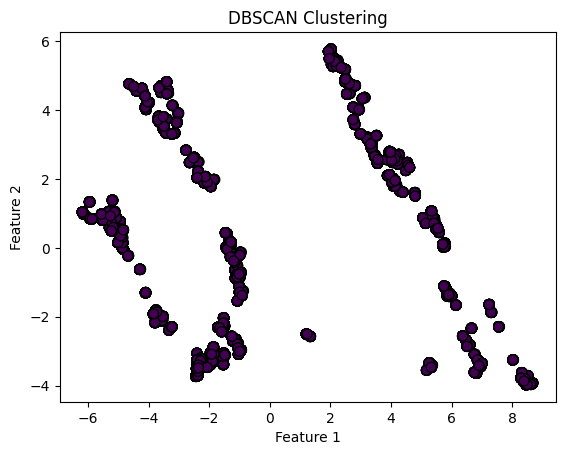

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

data = StandardScaler().fit_transform(df5.sample(25000))

dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# df5_map=df5[["latitude", "longitude"]].sample(2500, replace=False)
# print("df5_map shape", df5_map.shape)
# Standardize the data
# df5_sample = pd.DataFrame({
#     'latitude': [37.7749, 34.0522, 40.7128, 41.8781],
#     'longitude': [-122.4194, -118.2437, -74.0060, -87.6298],
#     # Add other relevant columns as needed
# })
df5_sample = df5.sample(500)
data_map = StandardScaler().fit_transform(df5_sample)
print("data_map shape",data_map.shape)
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data_map)

# Apply KNN
# num_clusters = 5
# kmeans = KMeans(n_clusters=num_clusters)
# cluster_labels = kmeans.fit_predict(data)

# Create a folium map centered around the mean latitude and longitude
map_center = [df5_sample['latitude'].mean(), df5_sample['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers to the map based on the clusters
for i, (lat, lon, label) in enumerate(zip(df5_sample['latitude'], df5_sample['longitude'], cluster_labels)):
    popup_text = f'Data Point {i+1}, Cluster: {label}'
    folium.Marker([lat, lon], popup=popup_text).add_to(mymap)

# Save the map as an HTML file or display it
mymap.save('cluster_map.html')
mymap


data_map shape (500, 51)


In [ ]:
df7 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/data7.csv")

# df7 = pd.read_csv("DataSets/data7.csv")

df7

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [ ]:
df7.drop(columns=["filename"], inplace=True)

label_encoder = LabelEncoder()
df7['label'] = label_encoder.fit_transform(df7["label"])

In [ ]:
df7["label"].nunique()

10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


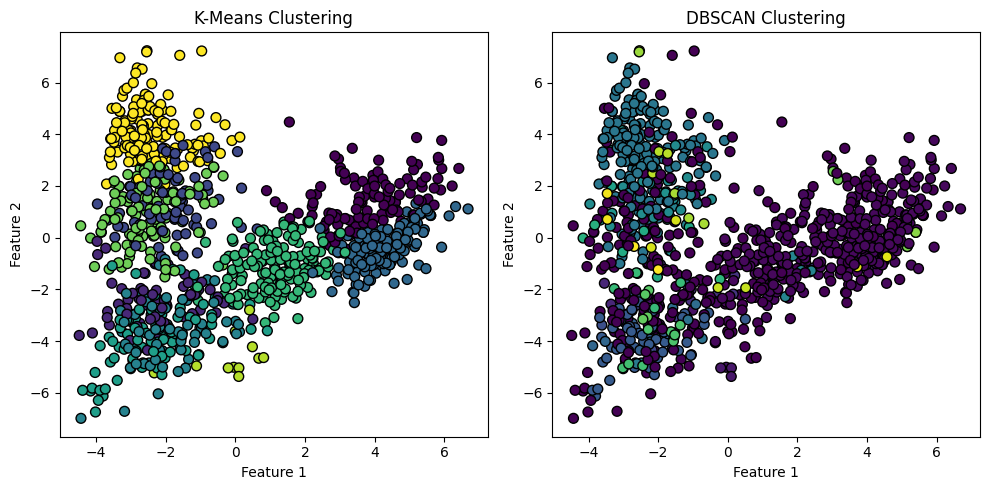

In [ ]:
data7 = StandardScaler().fit_transform(df7)

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
df7['cluster'] = kmeans.fit_predict(data7)

dbscan = DBSCAN(eps=3, min_samples=2)
cluster_labels = dbscan.fit_predict(data7)

pca = PCA(n_components=2)
data_pca7 = pca.fit_transform(data7)

# Create subplots with added height above the graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), gridspec_kw={'height_ratios': [1], 'width_ratios': [1, 1]})

# Plot K-Means clustering
axes[0].scatter(data_pca7[:, 0], data_pca7[:, 1], c=df7['cluster'], cmap='viridis', edgecolors='k', s=50)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot DBSCAN clustering
axes[1].scatter(data_pca7[:, 0], data_pca7[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/gdrive/MyDrive/kaggle'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle/

/content/gdrive/MyDrive/kaggle


In [ ]:
!kaggle competitions download -c quora-question-pairs

quora-question-pairs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%ls

kaggle.json               sample_submission.csv.zip  test.csv.zip  train.csv.zip
quora-question-pairs.zip  test.csv                   train.csv


In [ ]:
# !unzip quora-question-pairs.zip

In [ ]:
# !unzip /content/gdrive/MyDrive/kaggle/train.csv

In [ ]:
df8 = pd.read_csv('/content/gdrive/MyDrive/kaggle/train.csv')

In [ ]:
df8.drop(columns=["id", "qid1", "qid2"], inplace=True)

In [ ]:
df8.shape

(404290, 3)

In [ ]:
df8 = df8.sample(123)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

`find the Similarity between two questions by mapping the words in the questions using TF-IDF`

In [ ]:
def text_preprecess(questions):
  try:
    ps = PorterStemmer()
    tfidf = TfidfVectorizer()
    corpus = []

    for question in questions:
      tag = re.sub("[^a-zA-Z]", " ", question)
      tag = tag.lower()
      tag = nltk.word_tokenize(tag)
      tag = [ps.stem(word) for word in tag if not word in set(stopwords.words("english"))]
      tag = " ".join(tag)
      if tag != "":
        corpus.append(tag)
    # print(" ALL List comprehension", all(i == "" for i in corpus))
    # print("Any List comprehension", any(i == "" for i in corpus))

    if not corpus or all(word == "" for word in corpus) or len(corpus) <= 1 :
      return 0

    tfidf_matrix = tfidf.fit_transform(corpus)
    # print("tfidf_matrix",tfidf_matrix)

    similarity = cosine_similarity(tfidf_matrix)
    # print("similarity",similarity)

    print("corpus",corpus, similarity[0][1],4)
    return round(similarity[0][1],4)
  except Exception as e:
    print("corpus",corpus)
    print("Exception Happning", str(e))
    logging.exception("Error Occured")
    return 0

text_preprecess(['I love you Dhyana', 'I love you Dhyana'])


corpus ['love dhyana', 'love dhyana'] 1.0000000000000002 4


1.0

In [ ]:
df8['similarity'] = df8.apply(lambda row: text_preprecess([row['question1'], row['question2']]), axis=1)

corpus ['lesser known fact indian railway', 'amaz least known fact indian railway'] 0.5803329846765686 4
corpus ['god creat world', 'god achiev creat world'] 0.7765145304745156 4
corpus ['aftr bpharm', 'best advic offer four word'] 0.0 4
corpus ['meet life partner', 'meet spous'] 0.26055567105626243 4
corpus ['attach cv first time correspond professor higher studi', 'current cgpa th semest go higher studi tri get job first'] 0.19280132317038093 4
corpus ['say pleas advis email request polit obnoxi', 'polit way say pleas bring book present son birthday parti invit'] 0.2095424038071012 4
corpus ['even cesium posit ioniz enthalpi', 'enthalpi chemic reaction'] 0.1506401849870651 4
corpus ['first alway singular', 'singular'] 0.4494364165239821 4
corpus ['favorit meme', 'favorit meme'] 1.0000000000000002 4
corpus ['person overcom learn helpless', 'good step overcom learn helpless'] 0.5101490193104813 4
corpus ['tip make job interview process choic hotel', 'tip make job interview process morg

In [ ]:
df8.sample(5)

,question1,question2,is_duplicate,similarity
151475,What are the best places to visit for a two da...,Where are the best places to visit in Hyderaba...,1,0.8831
55219,What principles of general relativity are used...,Do GPS satellites use equations of the theory ...,1,0.3808
294826,What is the best way to make an anime series?,How do you start an anime series?,0,0.3563
351287,Can a non-cs graduate earn a MS degree in comp...,What should I learn for master degree after gr...,0,0.4380
233991,Why is the 16th amendment important? How is it...,What is the meaning of the 16th amendment? Is ...,1,0.6030


` using a supervised Algorithm you need to find the similarity between the questions.`

In [ ]:
# !pip install transformers
!pip install sentence-transformers pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=772b5d289d9c258c7643566ec67227a8a76907767183e04bd1f548f39f5d8a95
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Sample dataset of questions
data = {
    'Question': [
        'What is the capital of France?',
        'How many planets are there in the solar system?',
        'Who is the president of the United States?',
        'What is the largest mammal on Earth?',
        'How does photosynthesis work?',
        'What is the square root of 64?',
        'Who wrote the play "Romeo and Juliet"?'
    ]
}

# df = pd.DataFrame(data)

# Load a pre-trained BERT model for sentence embeddings
model = SentenceTransformer('bert-base-uncased')

# Encode the questions
question_embeddings_1 = model.encode(df8["question1"].tolist(), convert_to_tensor=True)
question_embeddings_2 = model.encode(df8["question2"].tolist(), convert_to_tensor=True)
# Calculate cosine similarity between pairs of questions
similarity_matrix = util.pytorch_cos_sim(question_embeddings_1, question_embeddings_2)

# Display the similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)

# Extracting similar question pairs
# threshold = 0.5  # Adjust as needed
# similar_questions = []
# for i in range(len(df8)):
#     for j in range(i + 1, len(df8)):
#         if similarity_matrix[i][j].item() > threshold:
#             similar_questions.append((df8['question1'][i], df['question2'][j]))

# # Display similar question pairs
# print("\nSimilar Question Pairs:")
# for pair in similar_questions:
#     print(pair)


Similarity Matrix:
tensor([[0.7664, 0.7202, 0.7144,  ..., 0.6176, 0.7725, 0.6722],
        [0.6347, 0.9395, 0.6374,  ..., 0.5825, 0.6604, 0.5723],
        [0.5405, 0.5359, 0.5720,  ..., 0.5403, 0.5571, 0.5431],
        ...,
        [0.5323, 0.6363, 0.7166,  ..., 0.8163, 0.6840, 0.6322],
        [0.6370, 0.6464, 0.7049,  ..., 0.6763, 0.8441, 0.6809],
        [0.6362, 0.6318, 0.6549,  ..., 0.6659, 0.6964, 0.7948]],
       device='cuda:0')


KeyError: ignored

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Define the questions
questions1 = "How important is sex in a relationship?"
questions2 = "Why is sex important in a good relationship?"

def supervised_text_process(question1, questions2):
  # Load a pre-trained BERT model and tokenizer
  model_name = 'bert-base-uncased'
  tokenizer = BertTokenizer.from_pretrained(model_name)
  model = BertModel.from_pretrained(model_name)


  # Tokenize and encode the questions
  tokens = tokenizer(questions1, questions2, return_tensors='pt', padding=True, truncation=True)

  # Forward pass through the model
  with torch.no_grad():
      outputs = model(**tokens)

  # Extract the embeddings for the [CLS] tokens
  embeddings1 = outputs.last_hidden_state[0, 0].numpy()
  embeddings2 = outputs.last_hidden_state[0, 1].numpy()

  # Calculate the cosine similarity between the embeddings
  def CosineSimilarity(a, b):
      dot_product = np.dot(a, b)
      norm_a = np.linalg.norm(a)
      norm_b = np.linalg.norm(b)
      similarity = dot_product / (norm_a * norm_b)
      return similarity

  similarity_score = CosineSimilarity(embeddings1, embeddings2)

  # print("Similarity Score:", similarity_score)
  return similarity_score


In [ ]:
supervised_text_process('Is our prime minister a virgin?','Is our prime minister a virgin?')

0.44302797

In [ ]:
df8['supervised_similarity'] = df8.apply(lambda row: supervised_text_process(row['question1'], row['question2']), axis=1)

In [ ]:
df8.sample(10)

,question1,question2,is_duplicate,similarity,supervised_similarity
369332,What's the best feeling in the world?,What was your best feeling in the world?,1,1.0000,0.414017
185944,What are some short-term courses I can graduat...,What are some short term courses in India?,1,0.8182,0.501464
291131,For how long will it take for my baby in the h...,What are the three most common good intoleranc...,0,0.0000,0.507224
284070,What are the best bollywood movies with more s...,Which Indian movies meet Hollywood standards?,0,0.1016,0.490731
89605,What is the placement like for M.Tech students...,Which is the best IIT for Computer Science stu...,0,0.6328,0.449681
239827,How did you meet your life partner?,Where and how did you meet your spouse?,1,0.2606,0.393945
210050,"If atheists don't believe in God, but aren't s...","Atheists don't believe in god, so what do they...",0,0.4112,0.521941
351287,Can a non-cs graduate earn a MS degree in comp...,What should I learn for master degree after gr...,0,0.4380,0.427078
25047,What is spectrum in fourier transform?,What is the Fourier transform of this?,0,0.7093,0.555384
21282,Where can I watch Naruto Shippuden?,Where can I watch Naruto (and Naruto Shippuden...,0,0.8178,0.417978


Q-9. A cyber security agent wants to check the Microsoft Malware so need he came
to you as a Machine learning Engineering with Data, You need to find the Malware
using a supervised algorithm and you need to find the accuracy of the model.


In [ ]:
!kaggle competitions download -c microsoft-malware-prediction

100% 1.53G/1.54G [00:23<00:00, 107MB/s] 
100% 1.54G/1.54G [00:23<00:00, 71.1MB/s]


In [ ]:
!ls

kaggle.json			  sample_submission.csv      test.csv.zip
microsoft-malware-prediction.zip  sample_submission.csv.zip  train.csv
quora-question-pairs.zip	  test.csv		     train.csv.zip


In [ ]:
!unzip microsoft-malware-prediction.zip

Archive:  microsoft-malware-prediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: microsoft-malware-prediction
  inflating: microsoft-malware-prediction  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: malware_test
error:  invalid response [malware_t]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [est]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: malware_test.csv
error:  invalid response [malware_t]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [est.csv]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Archive:  /content/gdrive/MyDrive/kaggle/train.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  /content/gdrive/MyDrive/kaggle/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               


In [ ]:
pd.read_csv( '/content/gdrive/MyDrive/kaggle/train.csv')

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
nums = [2,15,5,9,11,89,5,8,68,87,9,8,12]

print("nums", nums[-5:-5])

evens = list(filter(lambda n : n%2==0, nums))
# evens

nums []


In [ ]:
doubles = list(map(lambda n : n*2, evens))
doubles

In [ ]:
from functools import reduce

all_sum = reduce(lambda a,b : a+b, evens)
all_sum

In [ ]:
def add(n):
  return n*2

In [ ]:
persons ={
    'dhiren':'28',
    'kavita':27,
    'dhyana':0.1,
    'dhiren':'28'
}
persons